# MACHINE LEARNING  (by Prof.Krystyn Gutu)

# HANDS-ON MACHINE LEARNING (OPTIONAL EXERCISES) - WEEK 4

## CRN:-74016 ; FALL 2023

## Submitted by: Piyush Gupta


### TASK 1:
**Train and fine-tune a Decision Tree for the moons dataset by following these steps:<br>
a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.<br>
b. Split it into a training set and a test set using train_test_split().<br>
c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find
good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.<br>
d. Train it on the full training set using these hyperparameters, and measure your model’s
performance on the test set. You should get roughly 85% to 87% accuracy.**


**Import necessary libraries**

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

**Generate Moons dataset**

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

**Split the dataset into training and test sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Set up Grid Search with Cross-Validation for the DecisionTreeClassifier:**

In [4]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)


**Fit the model**

In [5]:
grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

**Get the best estimator and train it on full training set**

In [6]:
best_tree_clf = grid_search_cv.best_estimator_

#Measure model's performance on test dataset

y_pred = best_tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 86.95


### Hyperparameter tuning to find the optimal result:

In [7]:
#Exponential Growth

#Define hyperparameter grid

params = {'max_leaf_nodes': [2, 4, 8, 16, 32, 64, 128]}  

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train)

best_tree_clf = grid_search_cv.best_estimator_
print(f"Best parameters: {grid_search_cv.best_params_}")

# Predict and evaluate the model on the test set

y_pred = best_tree_clf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred)*100:.2f}")

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters: {'max_leaf_nodes': 4}
Accuracy on test set: 86.30


In [8]:
#Custom values

#Define hyperparameter grid

params = {'max_leaf_nodes': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}  

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train)

best_tree_clf = grid_search_cv.best_estimator_
print(f"Best parameters: {grid_search_cv.best_params_}")


# Predict and evaluate the model on the test set

y_pred = best_tree_clf.predict(X_test)
initial_model_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy on test set: {initial_model_accuracy:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'max_leaf_nodes': 20}
Accuracy on test set: 87.00


**Since custom values approach has fetched better accuracy, we plot a validation curve for to visualize model's performance against hyperparameter values:**

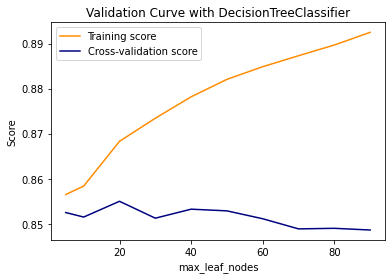

In [9]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Plot Validation Curve
param_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=42), X_train, y_train, param_name="max_leaf_nodes", 
                                             param_range=param_range, cv=3, scoring="accuracy")

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.title("Validation Curve with DecisionTreeClassifier")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Score")
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.legend(loc="best")
plt.show()

**Let's plot the decision tree:**

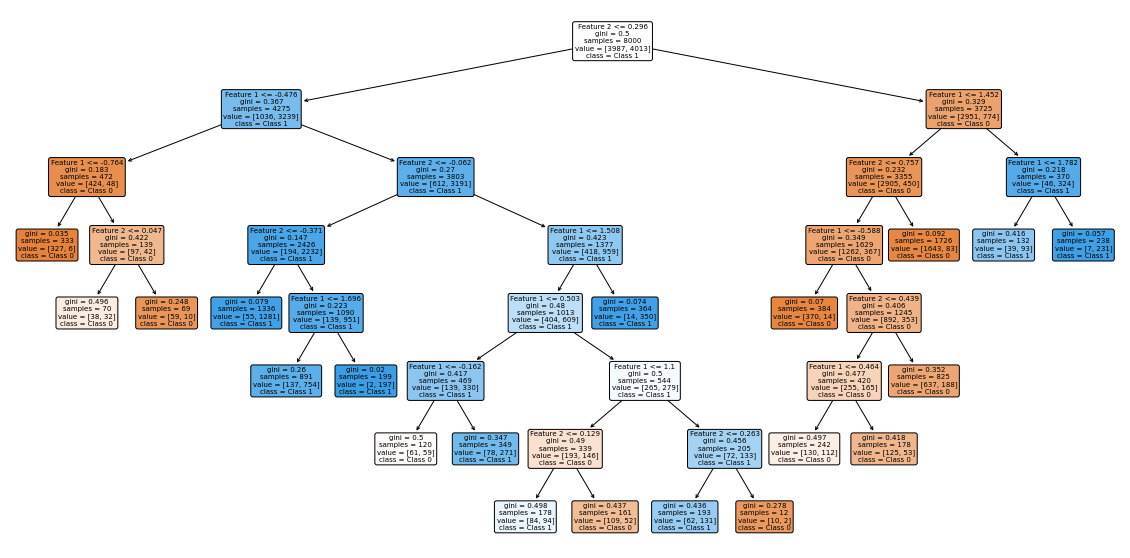

In [10]:
# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_tree_clf, filled=True, rounded=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.show()

### TASK 2:
**Grow a forest.<br>
a. Continuing the previous exercise, generate 1,000 subsets of the training set, each
containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit
class for this.<br>
b. Train one Decision Tree on each subset, using the best hyperparameter values found
above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on
smaller sets, these Decision Trees will likely perform worse than the first Decision Tree,
achieving only about 80% accuracy.<br>
c. Now comes the magic. For each test set instance, generate the predictions of the 1,000
Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode()
function for this). This gives you majority-vote predictions over the test set.<br>
d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy
than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a
Random Forest classifier!**

**Importing necessary libraries**

In [11]:
pip install numpy scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode
import numpy as np

**Generate 1000 subsets using ShuffleSplit and defining hyperparameter grid as observed from Task1**

In [13]:
best_max_leaf_nodes = grid_search_cv.best_params_['max_leaf_nodes']  

# a. Generate 1000 subsets using ShuffleSplit
n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))


**Train a Decision Tree on each subset and evaluate**

In [14]:
forest = [DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=42) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(f"Average accuracy of individual trees: {np.mean(accuracy_scores)*100:.2f}%")

Average accuracy of individual trees: 80.12%


**Now implementing the magic: Majority-vote predictions over the test set**

In [15]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

**Evaluate these predictions on the test set**

In [16]:
accuracy = accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))
print(f"Accuracy of the Random Forest: {accuracy*100:.2f}%")

Accuracy of the Random Forest: 87.20%


**The enthralling magic: Upon evaluating the Majority-vote predictions on the test set we obtained a slightly higher accauracy (0.23%) than the first model and this shows that a Random Forest Classifier is trained.**

**The accuracy achieved in the first model was 87.00% and upon evaluating 1000 Decision Trees on the test set, the accuracy achieved over these individual trees was 80.12% since they were trained on smaller sets. <br>Upon evaluating Majority-vote predictions over the test set, the accuracy achieved is 87.20%, that is, there is an improvement of 0.23% (slightly higher accuracy) resulting in successful training of Random Forest Classifier.** 

**Visualization of the results**

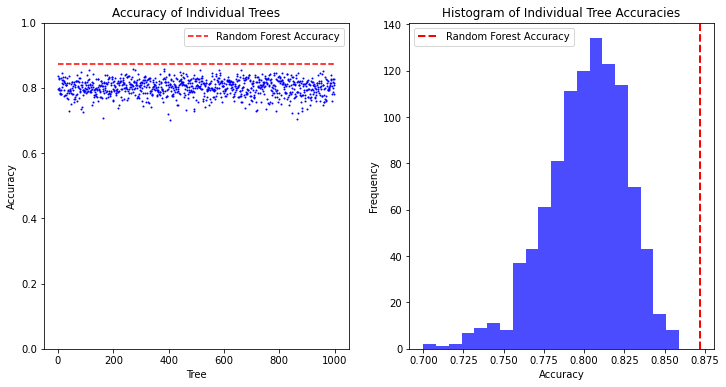

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(accuracy_scores, "b.", markersize=2)  # Plotting each tree's accuracy
plt.title('Accuracy of Individual Trees')
plt.xlabel('Tree')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Setting y-axis limits to 0-1 for accuracy

# Adding a line for the ensemble or RF accuracy
plt.hlines(accuracy, 0, n_trees, colors="r", linestyles="dashed", label="Random Forest Accuracy")
plt.legend()

# Histogram of individual tree accuracies
plt.subplot(122)
plt.hist(accuracy_scores, bins=20, color="b", alpha=0.7)
plt.title('Histogram of Individual Tree Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

# Adding a line for the ensemble accuracy on the histogram
plt.axvline(accuracy, color="r", linestyle="dashed", linewidth=2, label="Random Forest Accuracy")
plt.legend()

plt.show()


### TASK 3: 
**Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use the first 40,000 instances for training, the next 10,000 for validation, and the last 10,000 for testing).<br> Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM.<br> Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.<br> Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?**

**Load the MNIST dataset from fetch_openml library and split the data into train, validation and test dataset**

In [18]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Converting the target to integers
y = y.astype(int)

# Splitting the data into training, validation, and test sets
X_train, X_val, X_test = X[:40000], X[40000:50000], X[50000:]
y_train, y_val, y_test = y[:40000], y[40000:50000], y[50000:]


C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Training classifiers such as Random Forest classifier, Extra-Trees classifier and Support Vector Machine (SVM):**

In [19]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_val_pred = rf_clf.predict(X_val)
print(f"Random Forest validation accuracy: {accuracy_score(y_val, rf_val_pred)}")

# Extra Trees Classifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train, y_train)
et_val_pred = et_clf.predict(X_val)
print(f"Extra Trees validation accuracy: {accuracy_score(y_val, et_val_pred)}")


Random Forest validation accuracy: 0.9612
Extra Trees validation accuracy: 0.9637


In [20]:
 # SVM
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_val_pred = svm_clf.predict(X_val)
print(f"SVM validation accuracy: {accuracy_score(y_val, svm_val_pred)}")

SVM validation accuracy: 0.9696


**Ensemble Method (Voting Classifier):<br> After training the individual classifiers, we proceed to combine them using a Voting Classifier using hard or soft voting classifier on validation set.**

In [21]:
from sklearn.ensemble import VotingClassifier

# Hard Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('et', et_clf), ('svm', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
voting_val_pred = voting_clf.predict(X_val)
print(f"Hard Voting Classifier validation accuracy: {accuracy_score(y_val, voting_val_pred)}")

# Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[('rf', rf_clf), ('et', et_clf), ('svm', svm_clf)],
    voting='soft'
)
voting_clf_soft.fit(X_train, y_train)
voting_val_pred_soft = voting_clf_soft.predict(X_val)
print(f"Soft Voting Classifier validation accuracy: {accuracy_score(y_val, voting_val_pred_soft)}")


Hard Voting Classifier validation accuracy: 0.9663
Soft Voting Classifier validation accuracy: 0.9717


**Test the Best Ensemble on the Test Set: <br>After identifying which ensemble method performs best on the validation set (either hard or soft voting - which is Soft Voting Classifier with a validation accuracy of 97%) we then evaluate its performance on the test set.**

In [22]:
# Testing soft voting classifier on test set based on validation performance

best_model = voting_clf_soft  
best_model_test_pred = best_model.predict(X_test)
print(f"Best Model Test Accuracy: {accuracy_score(y_test, best_model_test_pred)}")


Best Model Test Accuracy: 0.97775


**Comparing the results:<br> The individual performance of the classifiers, namely: Random Forest, Extra-trees and Support Vector Machine (SVM) were 96.12%, 96.37% and 96.96% respectively. <br> Upon using the Ensemble mthod of Voting Classifiers, that is Hard and Soft Voting Classifiers, it is evident that the soft voting classifier produced an accuracy of 97.17% which is a significant improvement of 0.94% than the individual performance of the Classifiers(RF, ET, SVM).**

### TASK 4:
**Run the individual classifiers from the previous exercise to make predictions on the validation set and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class.<br> Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! <br>Now let’s evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. <br>How does it compare to the voting classifier you trained earlier?**

**Since we have already trained our classifiers: Random Forest, Extra-trees and SVM on train sets, we now run them on validation set to make predictions, thereby creating a new training set.**

In [23]:
clf1 = RandomForestClassifier()  # Random Forest
clf2 = ExtraTreesClassifier()  # Extra Trees
clf3 = SVC(probability=True)  # SVM

In [24]:
# Train the classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Get predictions on the validation set
preds_val1 = clf1.predict(X_val)
preds_val2 = clf2.predict(X_val)
preds_val3 = clf3.predict(X_val)

**We Combine the predictions from each classifier for each instance in the validation set into a new training set.**

In [25]:
# Create a new training set for the blender
import numpy as np
X_blender = np.column_stack((preds_val1, preds_val2, preds_val3))

**Train the blender using Logistic Regression and get predictions on test dataset:**

In [26]:
from sklearn.linear_model import LogisticRegression
blender = LogisticRegression()
blender.fit(X_blender, y_val)

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Get predictions on the test set
preds_test1 = clf1.predict(X_test)
preds_test2 = clf2.predict(X_test)
preds_test3 = clf3.predict(X_test)

**We have trained the Blender and together with the classifiers they form a stacking ensemble. Now we create input for the blender to evaluate and get the Stacking Ensemble's predictions on the test dataset.**

In [28]:
# Create input for the blender
X_test_blender = np.column_stack((preds_test1, preds_test2, preds_test3))

In [29]:
# Get the ensemble's predictions
stack_ensemble_preds = blender.predict(X_test_blender)

# Calculate accuracy
stack_ensemble_accuracy = accuracy_score(y_test, stack_ensemble_preds)
print(f"The Stacking Ensemble accuracy: {stack_ensemble_accuracy}")

The Stacking Ensemble accuracy: 0.96635


In [30]:
import xgboost as xgb

# X_blender consists of predictions from your classifiers, and y_val is the actual target

# Define and train the XGBoost model (blender)
xgb_blender = xgb.XGBClassifier(
    objective='multi:softmax',  # Multiclass classification problem
    eval_metric='mlogloss',     # Logarithmic loss metric
    num_class=10,               # Number of classes (digits 0-9)
    use_label_encoder=False     # Avoid a deprecation warning
)

xgb_blender.fit(X_blender, y_val)

# Getting predictions on the test set for the blender
ensemble_preds_xgb = xgb_blender.predict(X_test_blender)

# Calculating accuracy for the XGBoost blender
ensemble_accuracy_xgb = accuracy_score(y_test, ensemble_preds_xgb)

print(f"XGBoost Blender accuracy: {ensemble_accuracy_xgb:.4f}")


C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Blender accuracy: 0.9755


**FINAL RESULTS VISUALIZATION:<br> Created a bar plot comparing the accuracies of the Random Forest, Extra Trees, SVM, soft voting classifier, and the XGBoost blender:**

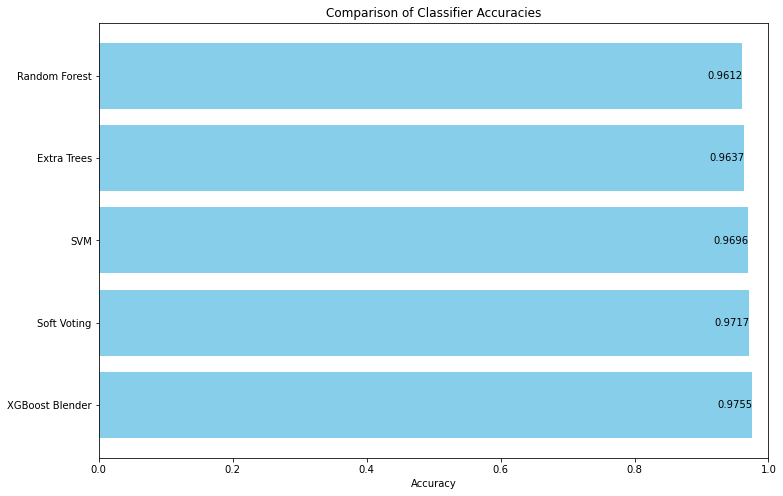

In [44]:
import matplotlib.pyplot as plt

# Defining the names of classifiers
classifiers = ['Random Forest', 'Extra Trees', 'SVM', 'Soft Voting', 'XGBoost Blender']

# Defining the accuracies obtained
accuracies = [0.9612, 0.9637, 0.9696, 0.9717, 0.9755]

# Creating bar plot to compare the accuracies
plt.figure(figsize=(12, 8))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 

# Labeling the accuracies
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{accuracy:.4f}', 
             va='center', ha='right')

plt.show()
